In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model
import os
from keras import callbacks
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [ ]:
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
def plot_learning_curves(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

Question 1 :


In [ ]:
!wget https://github.com/ml5js/ml5-data-and-models/raw/master/datasets/images/landscapes/landscapes_small.zip
!mkdir landscapes
!unzip landscapes_small.zip -d landscapes
!rm -r landscapes/__MACOSX
 

--2023-02-10 23:26:36--  https://github.com/ml5js/ml5-data-and-models/raw/master/datasets/images/landscapes/landscapes_small.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ml5js/ml5-data-and-models/master/datasets/images/landscapes/landscapes_small.zip [following]
--2023-02-10 23:26:36--  https://raw.githubusercontent.com/ml5js/ml5-data-and-models/master/datasets/images/landscapes/landscapes_small.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81935123 (78M) [application/zip]
Saving to: ‘landscapes_small.zip’

landscapes_small.zi 100%[===================>]  78.14M   385MB/s    in 0.2

In [ ]:
IMAGE_SIZE=224
BS = 64
seed = 42
input_dir = 'landscapes'
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)  

train_dataset = image_generator.flow_from_directory(input_dir,
                                                 batch_size=BS,
                                                 seed = seed,
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(input_dir,
                                                 batch_size=BS,
                                                 seed = seed,
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                                 subset= "validation",
                                                 class_mode='categorical')

Found 3026 images belonging to 7 classes.
Found 755 images belonging to 7 classes.


Question 2:

In [ ]:
with tf.device(device_name):
  model = Sequential([
        Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu', padding = 'same', input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Flatten(),
        Dense(units=7, activation = 'softmax')
        ])
  model.compile(optimizer = Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

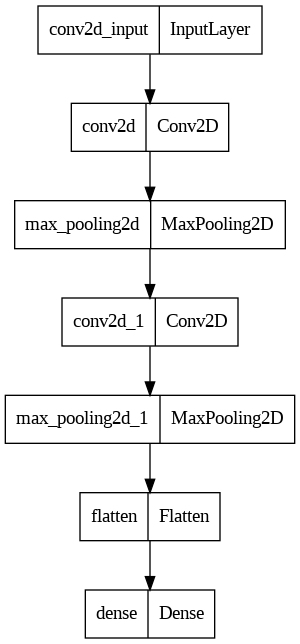

In [ ]:
plot_model(model)

In [ ]:
history1 = model.fit(train_dataset,epochs=20,validation_data=validation_dataset)

Epoch 1/20
48/48 [==============================] - 23s 270ms/step - loss: 1.8701 - accuracy: 0.4560 - val_loss: 0.9700 - val_accuracy: 0.6503
Epoch 2/20
48/48 [==============================] - 14s 283ms/step - loss: 0.8932 - accuracy: 0.6725 - val_loss: 0.9450 - val_accuracy: 0.6675
Epoch 3/20
48/48 [==============================] - 9s 197ms/step - loss: 0.7101 - accuracy: 0.7525 - val_loss: 0.8264 - val_accuracy: 0.7126
Epoch 4/20
48/48 [==============================] - 10s 209ms/step - loss: 0.5646 - accuracy: 0.8040 - val_loss: 0.7355 - val_accuracy: 0.7351
Epoch 5/20
48/48 [==============================] - 13s 261ms/step - loss: 0.4583 - accuracy: 0.8430 - val_loss: 0.7928 - val_accuracy: 0.7391
Epoch 6/20
48/48 [==============================] - 10s 211ms/step - loss: 0.3134 - accuracy: 0.8989 - val_loss: 0.7161 - val_accuracy: 0.7536
Epoch 7/20
48/48 [==============================] - 11s 226ms/step - loss: 0.2533 - accuracy: 0.9240 - val_loss: 0.7701 - val_accuracy: 0.7483


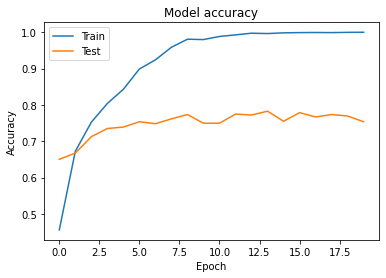

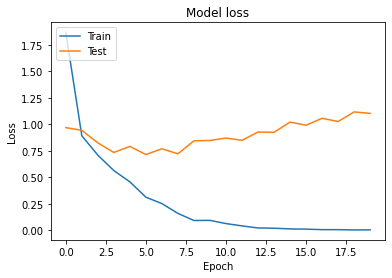

In [ ]:
plot_learning_curves(history1)

Commentaire :  

Question 3: 


In [ ]:
with tf.device(device_name):
  model_2 = Sequential([
        Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu', padding = 'same', input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Dropout(0.25),
        Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Flatten(),
        Dropout(0.5),
        Dense(units=7, activation = 'softmax')
        ])
  model_2.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

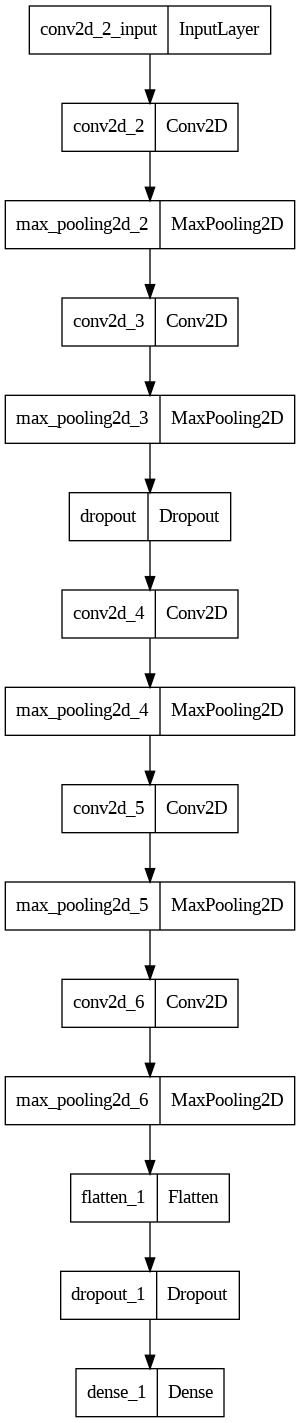

In [ ]:
plot_model(model_2)

In [ ]:
history2 = model_2.fit(train_dataset,epochs=20,validation_data=validation_dataset)

Epoch 1/20
48/48 [==============================] - 14s 251ms/step - loss: 1.7618 - accuracy: 0.2978 - val_loss: 1.4386 - val_accuracy: 0.4556
Epoch 2/20
48/48 [==============================] - 11s 237ms/step - loss: 1.3879 - accuracy: 0.4696 - val_loss: 1.2015 - val_accuracy: 0.5722
Epoch 3/20
48/48 [==============================] - 11s 235ms/step - loss: 1.2135 - accuracy: 0.5406 - val_loss: 1.0455 - val_accuracy: 0.6185
Epoch 4/20
48/48 [==============================] - 11s 232ms/step - loss: 1.0792 - accuracy: 0.5948 - val_loss: 0.9980 - val_accuracy: 0.6530
Epoch 5/20
48/48 [==============================] - 12s 239ms/step - loss: 0.9936 - accuracy: 0.6368 - val_loss: 0.8578 - val_accuracy: 0.7046
Epoch 6/20
48/48 [==============================] - 12s 238ms/step - loss: 0.8869 - accuracy: 0.6798 - val_loss: 0.8176 - val_accuracy: 0.7550
Epoch 7/20
48/48 [==============================] - 12s 238ms/step - loss: 0.8120 - accuracy: 0.7069 - val_loss: 0.8291 - val_accuracy: 0.6662

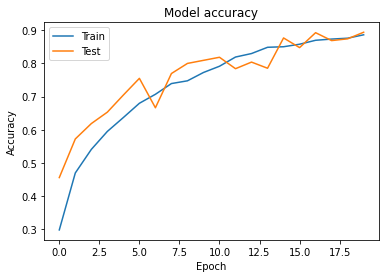

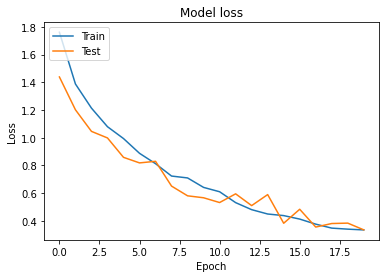

In [ ]:
plot_learning_curves(history2)

In [ ]:
augmenting_datagen = ImageDataGenerator(
    validation_split = 0.2,
    rescale=1. / 255,
    width_shift_range=0.2, # randomly shift images horizontally (fraction of total height)
    height_shift_range=0.2,# randomly shift images vertically (fraction of total height)
    shear_range=0.2,# set range for random shear
    zoom_range=0.2,# set range for random zoom
    horizontal_flip=True,# randomly flip images
    fill_mode='nearest' # set mode for filling points outside the input boundaries
)

In [ ]:
train_generator = augmenting_datagen.flow_from_directory(
        input_dir,
        subset="training",
        seed = seed,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BS,
        class_mode='categorical')

Found 3026 images belonging to 7 classes.


In [ ]:
with tf.device(device_name):
    model_3 = Sequential([
        Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu', padding = 'same', input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Flatten(),
        Dense(units=7, activation = 'softmax')
        ])
    model_3.compile(optimizer = Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience = 5)
history3 = model_3.fit(train_generator,epochs=30,validation_data=validation_dataset,callbacks=[callback])

Epoch 1/30
48/48 [==============================] - 38s 772ms/step - loss: 1.9243 - accuracy: 0.3979 - val_loss: 1.0829 - val_accuracy: 0.5788
Epoch 2/30
48/48 [==============================] - 37s 774ms/step - loss: 1.1804 - accuracy: 0.5482 - val_loss: 0.9645 - val_accuracy: 0.6384
Epoch 3/30
48/48 [==============================] - 37s 775ms/step - loss: 1.0909 - accuracy: 0.5948 - val_loss: 1.1087 - val_accuracy: 0.6437
Epoch 4/30
48/48 [==============================] - 37s 776ms/step - loss: 1.0533 - accuracy: 0.6229 - val_loss: 1.1467 - val_accuracy: 0.6212
Epoch 5/30
48/48 [==============================] - 38s 801ms/step - loss: 1.0006 - accuracy: 0.6464 - val_loss: 0.9755 - val_accuracy: 0.6755
Epoch 6/30
48/48 [==============================] - 37s 779ms/step - loss: 0.9472 - accuracy: 0.6652 - val_loss: 0.9994 - val_accuracy: 0.6596
Epoch 7/30
48/48 [==============================] - 37s 778ms/step - loss: 0.9352 - accuracy: 0.6758 - val_loss: 0.7611 - val_accuracy: 0.7311

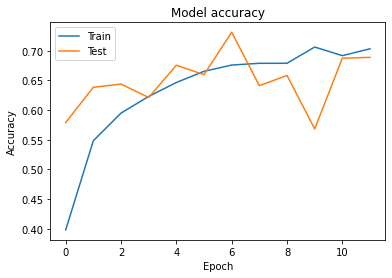

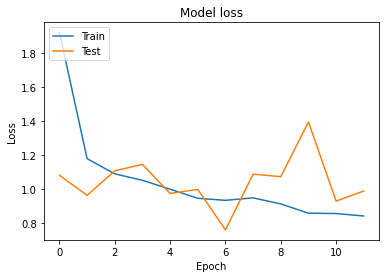

In [ ]:
plot_learning_curves(history3)

In [ ]:
with tf.device(device_name):
  model_4 = Sequential([
        Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu', padding = 'same', input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Dropout(0.25),
        Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Flatten(),
        Dropout(0.5),
        Dense(units=7, activation = 'softmax')
        ])
  model_4.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience = 5)
history4 = model_4.fit(train_generator,epochs=30,validation_data=validation_dataset,callbacks=[callback])

Epoch 1/30
48/48 [==============================] - 40s 794ms/step - loss: 1.6659 - accuracy: 0.3245 - val_loss: 1.3352 - val_accuracy: 0.5338
Epoch 2/30
48/48 [==============================] - 38s 795ms/step - loss: 1.3865 - accuracy: 0.4603 - val_loss: 1.4007 - val_accuracy: 0.4821
Epoch 3/30
48/48 [==============================] - 39s 801ms/step - loss: 1.2545 - accuracy: 0.5254 - val_loss: 1.1450 - val_accuracy: 0.5417
Epoch 4/30
48/48 [==============================] - 38s 799ms/step - loss: 1.1774 - accuracy: 0.5502 - val_loss: 1.0991 - val_accuracy: 0.6119
Epoch 5/30
48/48 [==============================] - 38s 794ms/step - loss: 1.0838 - accuracy: 0.6071 - val_loss: 0.8503 - val_accuracy: 0.7033
Epoch 6/30
48/48 [==============================] - 38s 798ms/step - loss: 1.0204 - accuracy: 0.6312 - val_loss: 0.9713 - val_accuracy: 0.6437
Epoch 7/30
48/48 [==============================] - 47s 985ms/step - loss: 0.9499 - accuracy: 0.6599 - val_loss: 0.9208 - val_accuracy: 0.7060

Question 4 :

In [ ]:
image_generator = ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1/255, validation_split=0.2)  

train_dataset_vgg16 = image_generator.flow_from_directory(input_dir,
                                                 batch_size=BS,
                                                 seed = seed,
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset_vgg16  = image_generator.flow_from_directory(input_dir,
                                                 batch_size=BS,
                                                 seed = seed,
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                                 subset= "validation",
                                                 class_mode='categorical')

Found 3026 images belonging to 7 classes.
Found 755 images belonging to 7 classes.


In [ ]:
vgg = VGG16(input_shape = [224,224,3], weights = 'imagenet',include_top = False )

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
pred = Dense(7, activation = 'softmax')(x)

In [ ]:
with tf.device(device_name):
  model_5 = Model(inputs = vgg.input, outputs=pred)
  model_5.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])


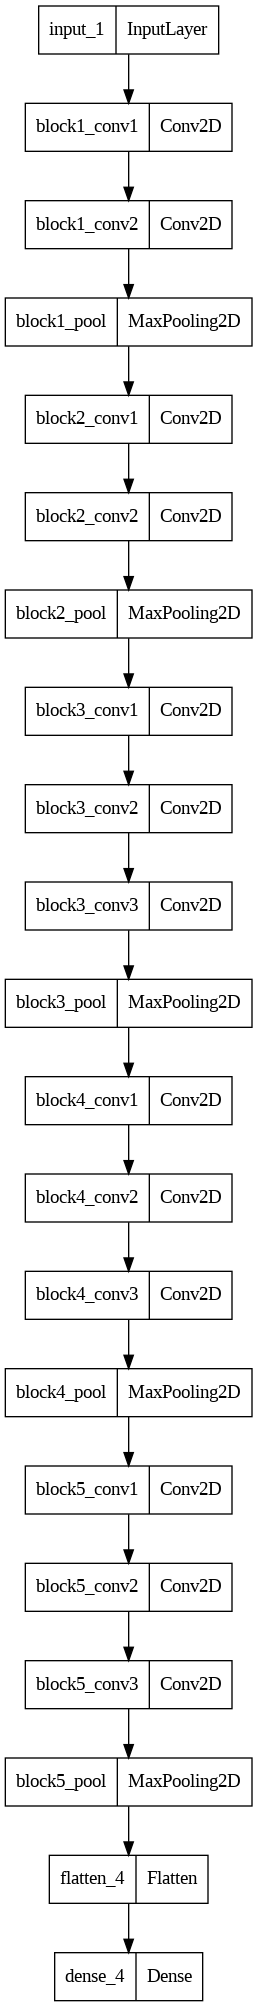

In [ ]:
plot_model(model_5)

In [ ]:
history5 = model_5.fit(train_dataset,validation_data=validation_dataset,epochs=9)

Epoch 1/9
48/48 [==============================] - 30s 496ms/step - loss: 0.8280 - accuracy: 0.7115 - val_loss: 0.3921 - val_accuracy: 0.8702
Epoch 2/9
48/48 [==============================] - 17s 348ms/step - loss: 0.2857 - accuracy: 0.9154 - val_loss: 0.3551 - val_accuracy: 0.8821
Epoch 3/9
48/48 [==============================] - 16s 339ms/step - loss: 0.1753 - accuracy: 0.9580 - val_loss: 0.2993 - val_accuracy: 0.9020
Epoch 4/9
48/48 [==============================] - 16s 333ms/step - loss: 0.1239 - accuracy: 0.9759 - val_loss: 0.3031 - val_accuracy: 0.9046
Epoch 5/9
48/48 [==============================] - 16s 336ms/step - loss: 0.0926 - accuracy: 0.9845 - val_loss: 0.2994 - val_accuracy: 0.9060
Epoch 6/9
48/48 [==============================] - 16s 339ms/step - loss: 0.0710 - accuracy: 0.9904 - val_loss: 0.3120 - val_accuracy: 0.8954
Epoch 7/9
48/48 [==============================] - 16s 341ms/step - loss: 0.0553 - accuracy: 0.9937 - val_loss: 0.2965 - val_accuracy: 0.9060
Epoch 

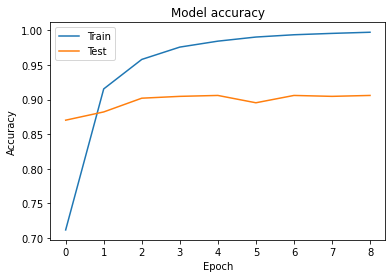

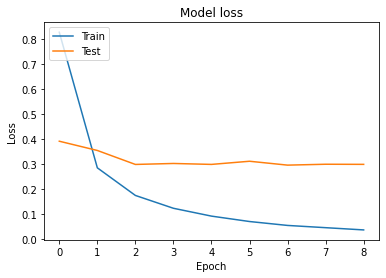

In [ ]:
plot_learning_curves(history5)

Question 5: 


In [ ]:
import pandas as pd

In [ ]:
data = [[history1.history['accuracy'][-1],history1.history['val_accuracy'][-1],history1.history['loss'][-1],history1.history['val_loss'][-1]],
        [history2.history['accuracy'][-1],history2.history['val_accuracy'][-1],history2.history['loss'][-1],history2.history['val_loss'][-1]],
        [history3.history['accuracy'][-1],history3.history['val_accuracy'][-1],history3.history['loss'][-1],history3.history['val_loss'][-1]],
        [history4.history['accuracy'][-1],history4.history['val_accuracy'][-1],history4.history['loss'][-1],history4.history['val_loss'][-1]],
        [history5.history['accuracy'][-1],history5.history['val_accuracy'][-1],history5.history['loss'][-1],history5.history['val_loss'][-1]],]

df = pd.DataFrame(data,columns=['accuracy', 'val_accuracy','loss','val_loss'],index=[
                               'Model_1:naif',
                               'Model_2:+complexe',
                               'Model_3:naif+aug',
                               'Model_4:+complexe+aug',
                               'Model_5:VGG'])
df

,accuracy,val_accuracy,loss,val_loss
Model_1:naif,1.000000,0.753642,0.005112,1.104256
Model_2:+complexe,0.886319,0.894040,0.333331,0.333678
Model_3:naif+aug,0.703239,0.688742,0.842945,0.990218
Model_4:+complexe+aug,0.778255,0.725828,0.651725,0.897304
Model_5:VGG,0.997356,0.905960,0.037398,0.299593


Question 6: 


In [ ]:
def mauvaise_pred(m):
  label = ['city','field','forest','lake','mountain','ocean','road']
  l = []
  img_temp = []
  for bach in range (1,6):
    l_temp = []
    for img in range (len(validation_dataset[bach][0])):
      img_array = np.array(validation_dataset[bach][0][img])
      img_batch = np.expand_dims(img_array, axis=0)
      prediction = m.predict(img_batch,verbose = 0)
      if np.argmax(prediction) != np.argmax(validation_dataset[bach][1][img]) : 
        l_temp.append([np.argmax(validation_dataset[bach][1][img]),np.argmax(prediction),round(np.max(prediction)*100, 2)])
        img_temp.append(validation_dataset[bach][0][img])
        break
    l.append(l_temp)
  fig = plt.figure(figsize=(15,8))
  for i in range(len(img_temp)):
    p = plt.subplot(1, 5, 1 + i)
    plt.imshow(img_temp[i])
    plt.axis('off')
    plt.title(label[l[i][0][0]], fontsize="large")
    plt.text(0.20, -0.1, f"Prediction: {label[l[i][0][1]]}",  transform=p.transAxes, fontsize="large")
    plt.text(0.17, -0.2, f"Certitude: {l[i][0][2]}%",  transform=p.transAxes, fontsize="large")
 


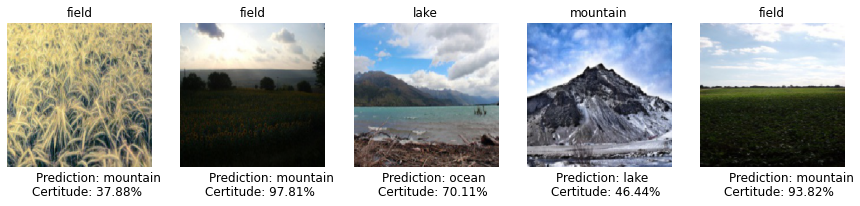

In [ ]:
mauvaise_pred(model)

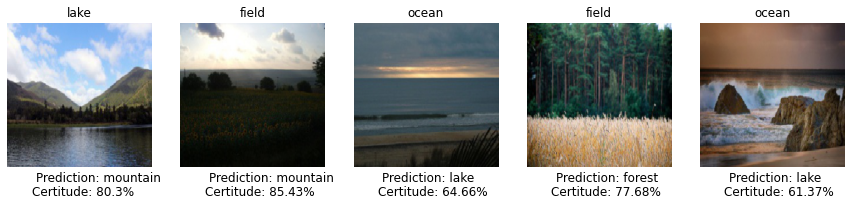

In [ ]:
mauvaise_pred(model_2)

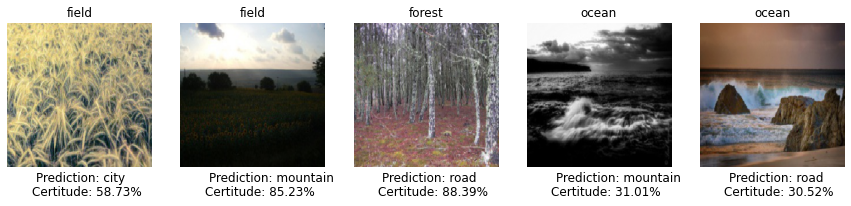

In [ ]:
mauvaise_pred(model_3)

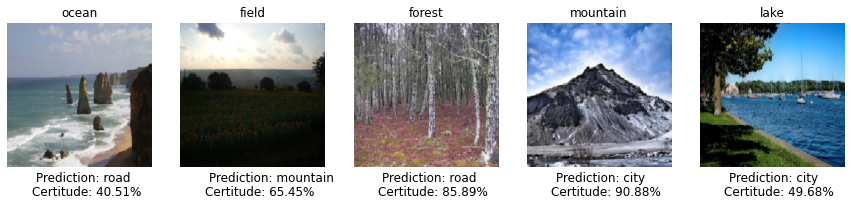

In [ ]:
mauvaise_pred(model_4)

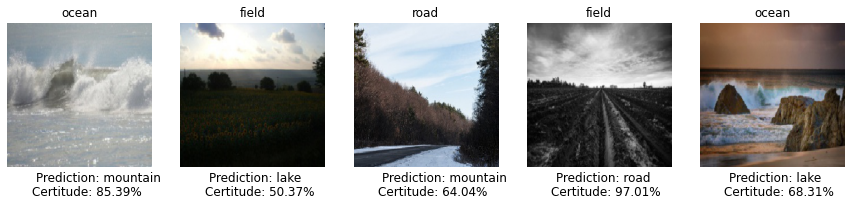

In [ ]:
mauvaise_pred(model_5)

In [ ]:

def extract_features(model,train, sample_count):
    features = []
    labels = []
    img = []
    i = 0 
    for img_batch, labels_batch in train:
        features_batch = model.predict(img_batch,verbose = 0)
        features.append(features_batch)
        labels.append(labels_batch)
        img.append(img_batch)

        i += 64
        if i >= sample_count:
            break
        
    return features, labels,img

In [ ]:
train_features, train_labels,train_img = extract_features(model_2,train_dataset, 200)
test_features, test_labels,test_img = extract_features(model_2,validation_dataset, 100)

In [ ]:
train_features_conc = np.concatenate(train_features)
test_features_conc = np.concatenate(test_features)

In [ ]:
train_labels2 = []
for labels in train_labels:
    for i in range (len(labels)):
      train_labels2.append(np.argmax(labels[i]))
train_labels2_arr = np.array(train_labels2)

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(train_features_conc)
X_tsne = TSNE(2, perplexity=50).fit_transform(X_pca)

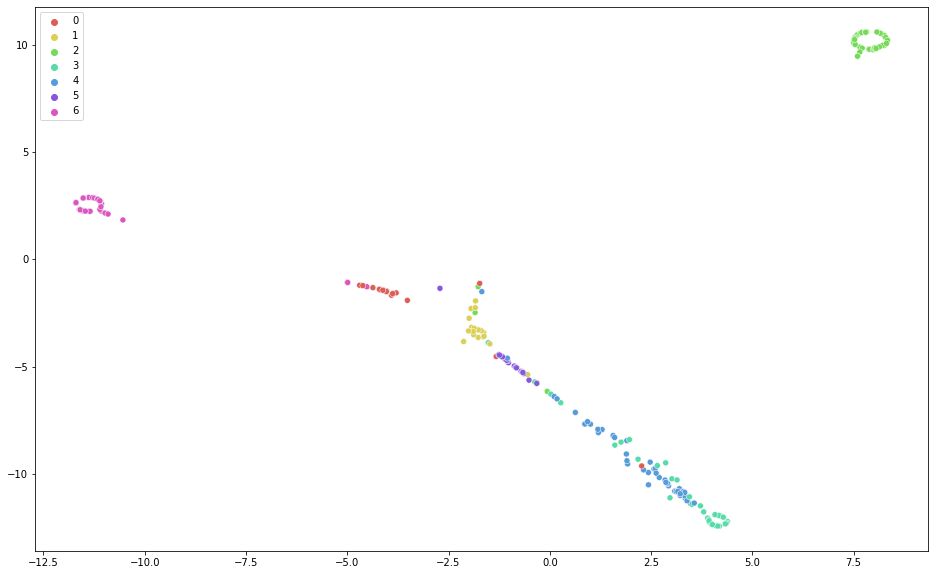

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=train_labels2_arr,
    palette=sns.color_palette("hls", 7),
    legend="full",
)

Question 8: 

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
samples = X_tsne 

In [ ]:
neigh = NearestNeighbors(n_neighbors=7, metric= 'euclidean')
neigh.fit(samples)


NearestNeighbors(metric='euclidean', n_neighbors=7)

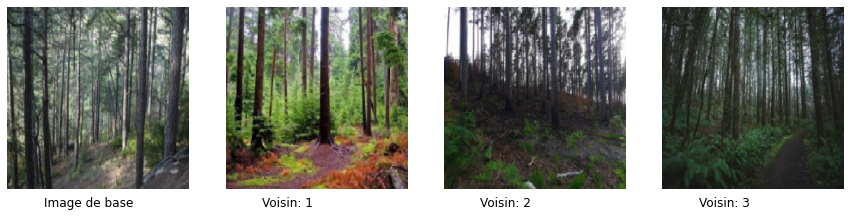

In [ ]:
img = X_tsne[np.random.randint(0,250)]
idx = neigh.kneighbors([img], n_neighbors=4, return_distance=False)
train_img_conc = np.concatenate(train_img)
fig = plt.figure(figsize=(15,8))
for i in range(0,4):
    p = plt.subplot(1, 4 ,  i+1)
    plt.imshow(train_img_conc[idx[0][i]])
    plt.axis('off')
    if i == 0:
      plt.text(0.20, -0.1, "Image de base",  transform=p.transAxes, fontsize="large")
    else :
      plt.text(0.20, -0.1, f"Voisin: {i}",  transform=p.transAxes, fontsize="large")
   